# Searching with Memories.AI API

This Jupyter notebook guides you through using the Memories.AI API to search in your library in frame resolution (to obtain time-stamp), and also search using audio.

First configure the API key

In [1]:
import requests
import os
API_KEY = "sk-7d70408a17687aea9f1dfd5627ad3462"  # Replace with your actual API key
headers = {"Authorization": API_KEY}  # API key

Upload 10 youtube videos
(these are 10 videos from Mr.Beast).

In [2]:
folder_path = "/Users/jerry/Downloads/youtube"

for file_name in os.listdir(folder_path):
    if file_name.endswith(".mp4"):  
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, "rb") as f:
            files = {
                "file": (file_name, f, "video/mp4")
            }

            response = requests.post(
                "https://api.memories.ai/serve/api/v1/upload",
                files=files,
                headers=headers
            )
        print(response.json())


{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833359891775488', 'videoName': 'DOG-YT'}, 'failed': False, 'success': True}
{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833379760328704', 'videoName': 'rock-YT'}, 'success': True, 'failed': False}
{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833390552408064', 'videoName': 'brasil-YT'}, 'success': True, 'failed': False}
{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833397263024128', 'videoName': 'Kai-YT'}, 'failed': False, 'success': True}
{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833405991641088', 'videoName': 'ronaldo-YT'}, 'success': True, 'failed': False}
{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833419555885056', 'videoName': 'ashall-YT'}, 'success': True, 'failed': False}
{'code': '0000', 'msg': 'success', 'data': {'videoNo': 'VI622833424589049856', 'videoName': 'simg-YT'}, 'success': True, 'failed': False}
{'code': '0000', 'msg': 'succ

We can check the status of these videos to see if they are all parsed.

In [3]:
json_body = {
    "page": 1,
    "size": 200,
}

response = requests.post("https://api.memories.ai/serve/api/v1/list_videos", headers=headers, json=json_body)
print(response.json())

{'code': '0000', 'msg': 'success', 'data': {'videos': [{'duration': '0', 'status': 'UNPARSE', 'cause': 'null', 'video_no': 'VI622833466192486400', 'video_name': 'paris-YT', 'create_time': '1757954270072'}, {'duration': '0', 'status': 'UNPARSE', 'cause': 'null', 'video_no': 'VI622833446755811328', 'video_name': 'money-YT', 'create_time': '1757954265440'}, {'duration': '0', 'status': 'UNPARSE', 'cause': 'null', 'video_no': 'VI622833431903780864', 'video_name': 'naruto-YT', 'create_time': '1757954261898'}, {'duration': '0', 'status': 'UNPARSE', 'cause': 'null', 'video_no': 'VI622833424589049856', 'video_name': 'simg-YT', 'create_time': '1757954260155'}, {'duration': '0', 'status': 'UNPARSE', 'cause': 'null', 'video_no': 'VI622833419555885056', 'video_name': 'ashall-YT', 'create_time': '1757954258953'}, {'duration': '0', 'status': 'UNPARSE', 'cause': 'null', 'video_no': 'VI622833405991641088', 'video_name': 'ronaldo-YT', 'create_time': '1757954255718'}, {'duration': '15', 'status': 'PARSE'

We illustrate how to search using a snapshot of Mr.Beast's tiktok video, which is Ronaldo with him.
This also appears in our uploaded video, of which the video_no is VI622833405991641088.

The snapshot is 

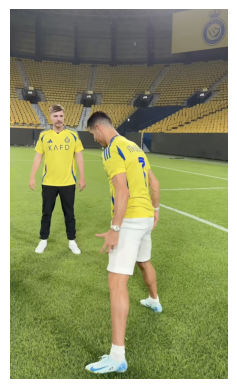

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "/Users/jerry/Downloads/siu.png"
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis("off")  # hide axes
plt.show()

The search body is 

In [ ]:

url = "https://api.memories.ai/serve/api/v1/search_similar_images"

data = {
    "unique_id": "default",
}
files = [
  ('file', ('siu.png', open('/Users/jerry/Downloads/siu.png','rb'), 'image/png'))
]
response = requests.post(url, headers=headers, data=data, files=files)
print(response.text)

{"code":"0000","msg":"success","data":[{"videoNo":"VI622833405991641088","videoName":"ronaldo-YT","startTime":"4","score":0.92300373315811157},{"videoNo":"VI622833405991641088","videoName":"ronaldo-YT","startTime":"0","score":0.87605708837509155},{"videoNo":"VI622833405991641088","videoName":"ronaldo-YT","startTime":"3","score":0.85900944471359253}],"success":true,"failed":false}


Let's check the video to see if this is correct.

In [ ]:
from IPython.display import Video, display

video_path = "/Users/jerry/Desktop/OpenInterX/memories-ai-sdk/video/ronaldo-YT.mp4"
display(Video(video_path, embed=True, width=640, height=480))


We can also use audio to search for video frame and time stamp

In [9]:
url = "https://api.memories.ai/serve/api/v1/search_audio_transcripts"

params = {
    "page": 1,
    "page_size": 100,
    "unique_id": "default",
    "query": "That's it? So one, two, jump."
}

response = requests.get(url, headers=headers, params=params)
print(response.text)

{"code":"0000","msg":"success","data":{"videos":[{"videoNo":"VI622833405991641088","videoName":"ronaldo-YT","startTime":"4","audio_ts":" That's it? So one, two, jump."}],"current_page":1,"page_size":100,"total_count":"3"},"success":true,"failed":false}
